#Uber Ride Cancellation

###We are analysing ride cancellations by Uber Drivers on Airport to City route after accepting the ride. Also, the issue of cabs not available at the airport will br adddressed here.

###Assumptions include that the rides were cancelled by drivers only, there are no dry bookings and the route is only from Airport to the city

In [ ]:
# prompt: import numpy, seaborn, pandas and matplotlib

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Uber Ride Cancellation/uber-data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [ ]:
# check for duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
#percentage of missing data

In [ ]:
100*df.isnull().sum()/df.shape[0]

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

###When cab is not available, driver ID and drop time stamp

###when driver cancels the ride, the drop time will not be available but start time will be be present

Cancellation rate

In [ ]:
df["Status"].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [ ]:
df.shape

(6745, 6)

cancellation rate =

In [ ]:
100*(1264/6745)

18.739807264640472

In [ ]:
Cb_not_avail = df[~(df["Status"]=="Trip Completed")].shape[0]

In [ ]:
100*(Cb_not_avail/df.shape[0])

58.028169014084504

## Root Cause Analysis

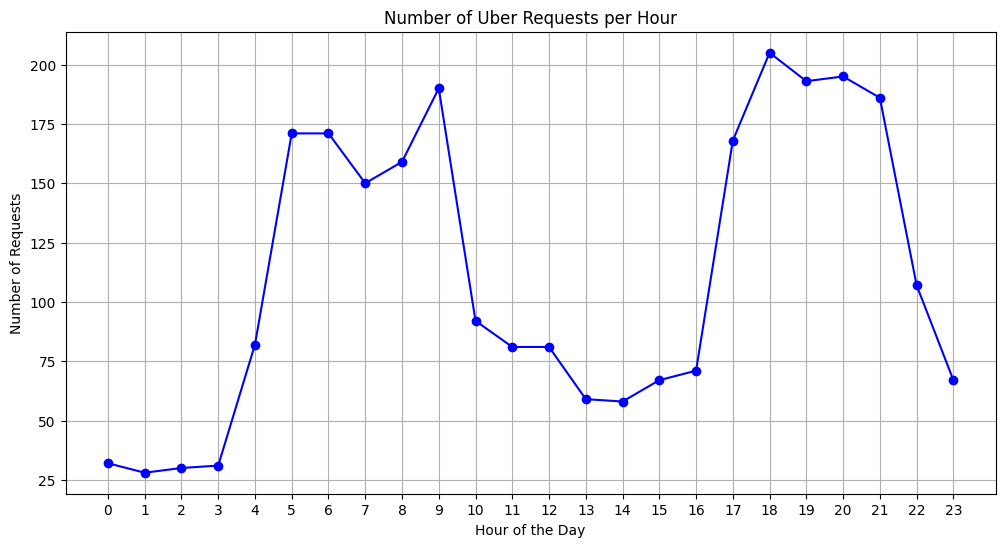

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Request timestamp' column to datetime format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')

# Extract the hour from the 'Request timestamp' column
df['Request hour'] = df['Request timestamp'].dt.hour

# Count the number of requests for each hour
hourly_requests = df['Request hour'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(hourly_requests.index, hourly_requests.values, marker='o', linestyle='-', color='b')
plt.title('Number of Uber Requests per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.xticks(range(24))
plt.show()


there are more requests during morning and evening

<Axes: xlabel='Request hour', ylabel='count'>

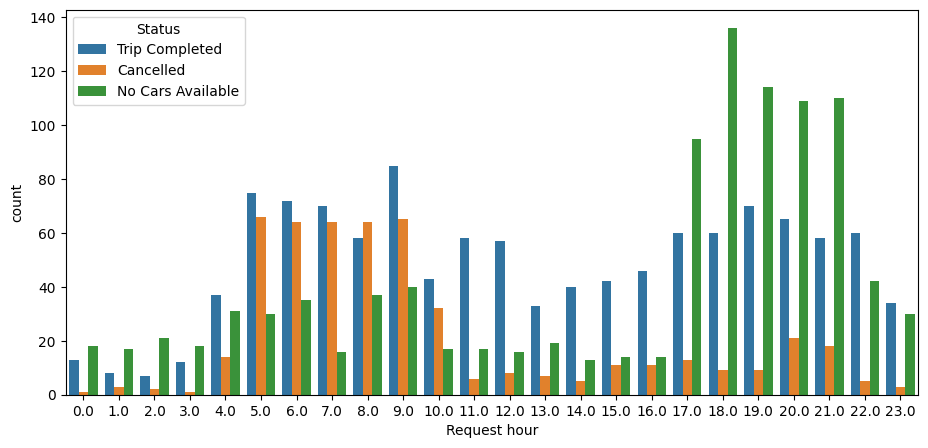

In [ ]:
plt.figure(figsize=(11,5))
sns.countplot(x = df["Request hour"], hue=df["Status"])



1.   Most Cancellations are happening during mornning slot (5-9AM)
2.   Most cars are not available during evening slot (5-9PM)



In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21.0
4,3112,City,1.0,Trip Completed,NaT,13-07-2016 09:25:47,NaN


<Axes: xlabel='Request hour', ylabel='count'>

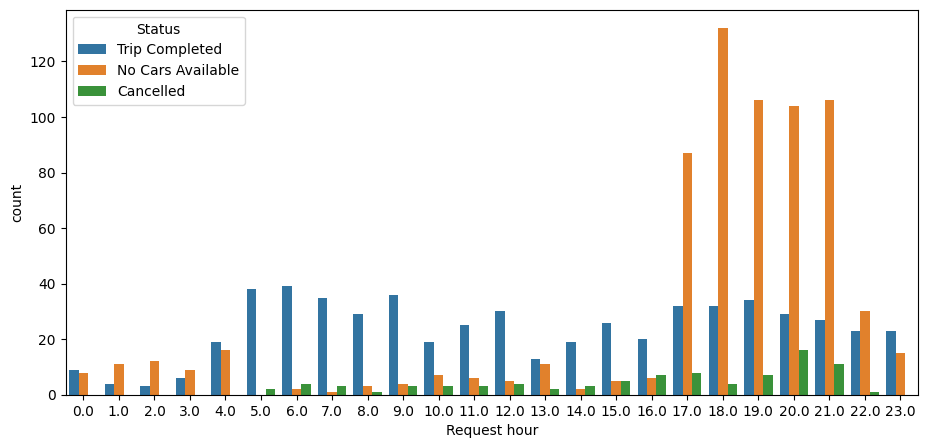

In [ ]:
a = df[df["Pickup point"] == "Airport"]
plt.figure(figsize=(11,5))
sns.countplot(x = a["Request hour"], hue=a["Status"])

the evening slot has high demand of requests at the airport but not enough cabs available

<Axes: xlabel='Request hour', ylabel='count'>

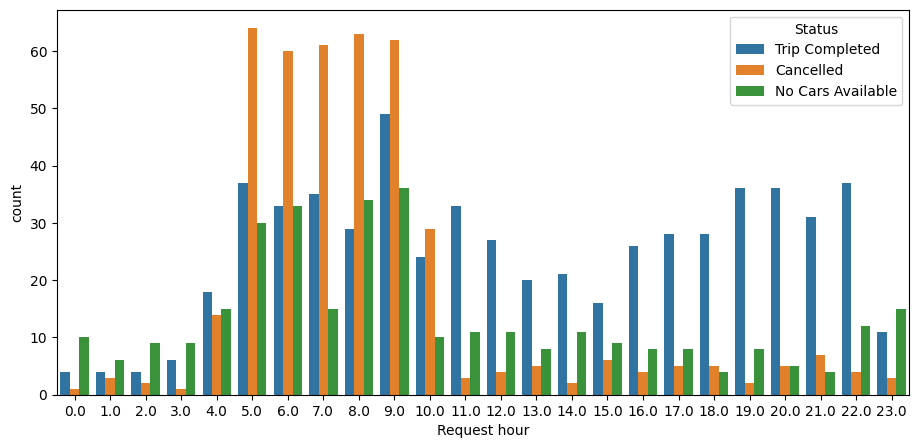

In [ ]:
b = df[df["Pickup point"] == "City"]
plt.figure(figsize=(11,5))
sns.countplot(x = b["Request hour"], hue=b["Status"])

in city in the morning slot, trips are getting cancelled

#Summary



*   there are more requests during morning and evening
*   Most Cancellations are happening during mornning slot (5-9AM)
*   Most cars are not available during evening slot (5-9PM)
*   the evening slot has high demand of requests at the airport but not enough cabs available
*   in city in the morning slot, trips are getting cancelled
   




##The drivers are aware that if they accept the order for Airport in the morning there is less demand to come back to the city in the afternoon. And they might have to wait till the eve to get a ride back to the city

##this is why no cabs available at the airport in the eve




## Suggest a solution



1.   Increase the perk : like additonal perks at the airport
2.   perks for accepting rides in the morning going to airport
3.   Create recreation centers at airport

